## Task 1 - Reading the .txt file

In [1]:
file = open('../BIO_CS_DATA/TEST/biology/class_11_biology_chapter_1_0.txt')
text = file.read()
file.close()
print(text)

Chapter 1
The Living World

Chapter 2
Biological Classification

Chapter 3
Plant Kingdom

Chapter 4
Animal Kingdom

 

UNIT I

DIVERSITY IN THE LIVING WORLD

Biology is the science of life forms and living processes. The living world
comprises an amazing diversity of living organisms. Early man could
easily perceive the difference between inanimate matter and living
organisms. Early man deified some of the inanimate matter (wind, sea,
fire etc.) and some among the animals and plants. A common feature of
all such forms of inanimate and animate objects was the sense of awe
or fear that they evoked. The description of living organisms including
human beings began much later in human history. Societies which
indulged in anthropocentric view of biology could register limited
progress in biological knowledge. Systematic and monumental
description of life forms brought in, out of necessity, detailed systems
of identification, nomenclature and classification. The biggest spin off
of such studi

In [2]:
text = text.lower()
print(text)

chapter 1
the living world

chapter 2
biological classification

chapter 3
plant kingdom

chapter 4
animal kingdom

 

unit i

diversity in the living world

biology is the science of life forms and living processes. the living world
comprises an amazing diversity of living organisms. early man could
easily perceive the difference between inanimate matter and living
organisms. early man deified some of the inanimate matter (wind, sea,
fire etc.) and some among the animals and plants. a common feature of
all such forms of inanimate and animate objects was the sense of awe
or fear that they evoked. the description of living organisms including
human beings began much later in human history. societies which
indulged in anthropocentric view of biology could register limited
progress in biological knowledge. systematic and monumental
description of life forms brought in, out of necessity, detailed systems
of identification, nomenclature and classification. the biggest spin off
of such studi

## Task 2 - Acquiring the file metadata

In [3]:
from nltk.tokenize import sent_tokenize, word_tokenize, casual_tokenize, MWETokenizer

sentences = sent_tokenize(text)
words = word_tokenize(text)
casual_words = casual_tokenize(text)
tokenizer = MWETokenizer([
    ('the', 'science'), ('the', 'living', 'world'), ('the', 'animals'), 
    ('the', 'sense'), ('the', 'following'), ('a', 'description')
])
MWETokenizer_words = tokenizer.tokenize(words)

In [4]:
print('Number of tokens acquired with sent_tokenize:', len(sentences))
print('Number of tokens acquired with word_tokenize:', len(words))
print('Number of tokens acquired with casual_tokenize:', len(casual_words))
print('Number of tokens acquired with MWETokenizer: ', len(MWETokenizer_words))

Number of tokens acquired with sent_tokenize: 13
Number of tokens acquired with word_tokenize: 253
Number of tokens acquired with casual_tokenize: 253
Number of tokens acquired with MWETokenizer:  242


In [5]:
print('Mean number of tokens per sentence (word_tokenize):', len(words) / len(sentences))
print('Mean number of tokens per sentence (casual_tokenize):', len(casual_words) / len(sentences))
print('Mean number of tokens per sentence (MWETokenizer):', len(MWETokenizer_words) / len(sentences))

Mean number of tokens per sentence (word_tokenize): 19.46153846153846
Mean number of tokens per sentence (casual_tokenize): 19.46153846153846
Mean number of tokens per sentence (MWETokenizer): 18.615384615384617


In [6]:
words_set = set(words)
casual_words_set = set(casual_words)
MWETokens_set = set(MWETokenizer_words)

In [7]:
words_set == casual_words_set

True

Okey, so, **word_tokenize** and **casual_tokenize** produce the same result.

## Task 3 - Comparing the Stemmers

In [8]:
import pandas as pd
from nltk.stem import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import SnowballStemmer

lancaster_st = LancasterStemmer()
snowball_st = SnowballStemmer('english')
porter_st = PorterStemmer()

df = pd.DataFrame(columns=['token', 'porter', 'lancaster', 'snowball'])
for index, token in enumerate(words_set):
    df.loc[index] = [token, porter_st.stem(token), lancaster_st.stem(token), snowball_st.stem(token)]

df.head()

,token,porter,lancaster,snowball
0,other,other,oth,other
1,vertically,vertic,vert,vertic
2,fear,fear,fear,fear
3,’,’,’,’
4,an,an,an,an


## Task 4 - Frequencies of tokens

In [9]:
words_dict = { token : words.count(token) for token in words }
sorted_dict = sorted(words_dict.items(), key=lambda x: x[1], reverse=True)
for i in range(10):
    print(sorted_dict[i])

('of', 17)
('the', 13)
('.', 12)
('and', 11)
('living', 9)
(',', 9)
('in', 6)
('organisms', 6)
('chapter', 4)
('a', 4)


Text(0.5, 1.0, 'Frequency of tokens')

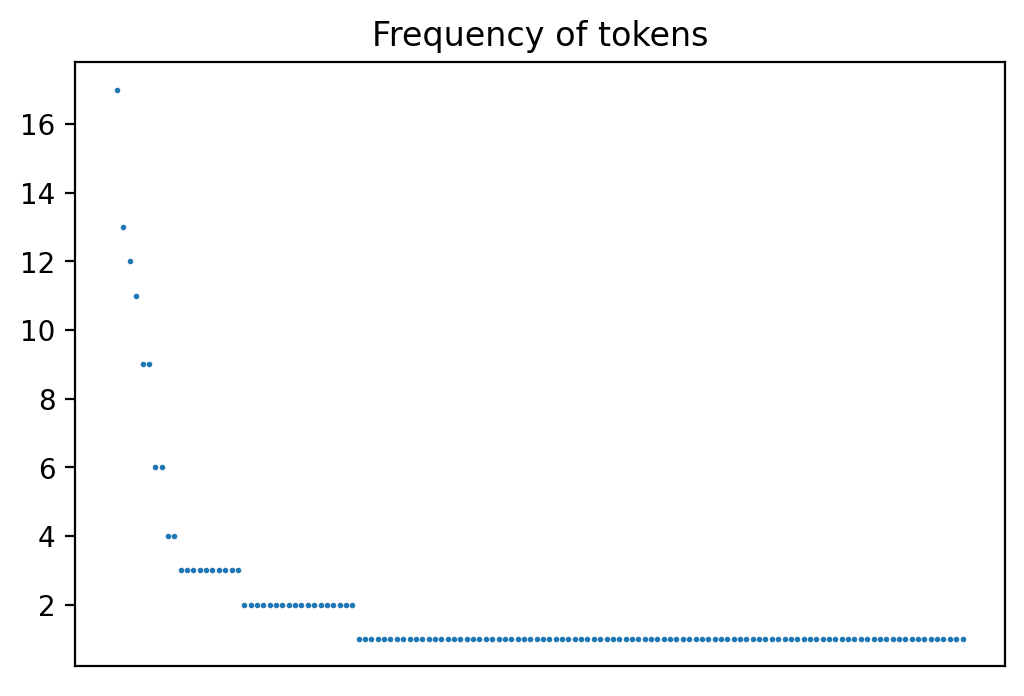

In [10]:
import matplotlib.pyplot as plt

y = [ t[1] for t in sorted_dict ]
x = range(len(sorted_dict))

plt.figure(dpi=200)
plt.scatter(x, y, s=1, marker='o')
plt.xticks([])
plt.title('Frequency of tokens')

## Task 5 - Part of speech tagging

In [11]:
from nltk import pos_tag

tagged_words = pos_tag(words_set)
tagged_words_dict = {}

for tupl in tagged_words:
    if tupl[1] in tagged_words_dict:
        tagged_words_dict[tupl[1]].append(tupl[0])
    else:
        tagged_words_dict[tupl[1]] = [tupl[0]]
        
tagged_words_dict

{'JJ': ['other',
  'anthropocentric',
  'taxonomist',
  'such',
  '2019-2020',
  'systematic',
  'common',
  'monumental',
  'animate',
  'early',
  'human',
  'present'],
 'RB': ['vertically',
  'much',
  'later',
  'horizontally',
  'easily',
  'also',
  'ever'],
 'VBP': ['fear', 'are', 'awe', 'sea', 'spin', 'feature', 'perspective'],
 'PDT': ['’'],
 'DT': ['an', 'both', 'this', 'all', 'each', 'some', 'the', 'a'],
 'VBZ': ['comprises', 'is', 'processes'],
 'NNS': ['objects',
  'forms',
  'systems',
  'studies',
  'movements',
  'societies',
  'wind',
  'chapters',
  'beings',
  'organisms',
  'plants',
  'similarities',
  'animals'],
 'CC': ['and', 'or'],
 'NN': ['matter',
  'biology',
  'identification',
  'nomenclature',
  'history',
  'plant',
  'necessity',
  'knowledge',
  'unit',
  'classification',
  'earth',
  'science',
  'chapter',
  'description',
  's',
  'i',
  'man',
  'view',
  'etc',
  'diversity',
  'register',
  'fire',
  'world',
  'progress',
  'difference',
  're